# Fractal Embeddings Demo Notebook

This walks through some of the functionality contained in this repo with example results.

#### Main Point of This File
- To describe code functionality 
- To steal code snippets and shell commands
- A playground for development

# Creating Embeddings from Text Directories

The `embed_text_cohere.py` script takes a directory containing text files and generates embeddings using Cohere's API. The embeddings are saved as a DataFrame in a `.csv` file. This script supports recursive search for `.md` files in the input directory and can handle API rate limits.

Here's an example of how to run the script from the command line:

```bash
python src/embed_text_cohere.py -i ./data -e output_embeddings.csv -c config.ini
```

Review the script to understand the command line arguments. Briefly, the -i input dir is being stored in the -e embedding file and a -n npz file, with an api key found in -c config.ini

Now let's run the script using the provided data directories.

##### Via Command Line

In [8]:
response = input("Are you sure you want to generate the embeddings again? (Y/N))")

if response == 'Y' or response == 'y' or response == 'yes' or response == 'Yes':
    !python src/embed_text_cohere.py -i ./data/memory -e ./demo_data/memory_embeddings.csv -n -c config.ini
    !python src/embed_text_cohere.py -i ./data/my-second-brain -e ./demo_data/my_second_brain_embeddings.csv -n -c config.ini
else:
    print("Skipping embedding generation.")

Embedding text: 100%|█████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]


##### Programmatically

In [13]:
import configparser
import src.embed_text_cohere as emb

config = configparser.ConfigParser()
config.read('./config.ini')                 # ADD CONFIG FILE WITH API KEY IN IT
api_key = config.get('cohere', 'api_key')

response = input("Are you sure you want to generate the embeddings again? (Y/N))")

if response == 'Y' or response == 'y' or response == 'yes' or response == 'Yes':
    print('Generating embeddings...')
    memory_folder_name = './data/memory'
    my_second_brain_folder_name = './data/my-second-brain'

    # Read the input data
    memory_df = emb.read_input_data(memory_folder_name)
    my_second_brain_df = emb.read_input_data(my_second_brain_folder_name)

    # Create embeddings
    memory_df_embeddings = emb.create_embeddings(memory_df, api_key)
    my_second_brain_df_embeddings = emb.create_embeddings(my_second_brain_df, api_key)

    # Save embeddings as a .npz file
    emb.save_embeddings_npz(memory_df_embeddings, './demo_data/memory_embeddings.npz')
    emb.save_embeddings_npz(my_second_brain_df_embeddings, './demo_data/my_second_brain_embeddings.npz')
else:
    print('Exiting...')

Exiting...


## Load in previously generated embeddings

After running the above commands, you should have two `.csv` files containing embeddings for your data: `memory_embeddings.csv`and `my_second_brain_embeddings.csv`. You can load these files using pandas and visualize the embeddings or perform further analysis.

In [14]:
import pandas as pd

memory_embeddings_df = pd.read_csv('./demo_data/memory_embeddings.csv')
my_second_brain_embeddings_df = pd.read_csv('./demo_data/my_second_brain_embeddings.csv')

memory_embeddings_df.head()


,filename,index,chunk_text,embedding,links
0,Heretics of Dune,0,# Heretics of Dune ![rw-book-cover](https://im...,"[1.4345703, -0.37695312, 0.18273926, -0.636718...","['Frank Herbert', 'Books', 'Psychedelics', 'Sc..."
1,CSC 581,1,"--- **Status::** #🗺️ **Tags::** [[MOC]], [[Win...","[0.92285156, -0.5053711, 0.7392578, 0.30615234...","['MOC', 'Winter 2023']"
2,Tensorflow Mac M1,2,## AAAh [Good post on SO](https://stackoverflo...,"[1.8417969, 0.6347656, 0.027954102, 1.9462891,...",['Programming Notes']
3,Tensorflow Mac M1,2,optimizer=tf.keras.optimizers.legacy.Adam(lear...,"[3.5527344, 0.11090088, 0.33618164, 1.2988281,...",['Programming Notes']
4,Snowflake,3,## Snowflake Here's to you - You doubters of m...,"[0.80810547, 1.3378906, -0.18164062, 0.0483093...","['Poetry', 'My Writings']"


In [15]:
my_second_brain_embeddings_df.head()

,filename,index,chunk_text,embedding,links
0,Welcome in my mind 🧠,0,"## Who I am? I'm **Anthony**, a `Date.today.ye...","[0.8691406, -0.91748047, 1.21875, -1.6054688, ...",[]
1,Welcome in my mind 🧠,0,want. Here's a hint: you can just watch the su...,"[0.75634766, -0.33984375, 0.22790527, -1.01953...",[]
2,README,1,*You'll have a better browsing experience of t...,"[1.0322266, -1.8320312, 0.36694336, -0.9697265...",[]
3,README,1,deep into a wide variety of fields and engage ...,"[1.2236328, -0.5444336, -0.43579102, 0.4089355...",[]
4,Contact me 💌,2,## Want to get in touch? 😊 I'd love to hear fr...,"[-0.6777344, 0.38598633, 1.8916016, -2.1796875...",[]


# Dimensionality Reduction

We'll perform dimensionality reduction on the embeddings to visualize them in a lower-dimensional space. The `dimensionality_reduction.py` script can perform PCA, t-SNE, and UMAP dimensionality reduction methods. 

### Combining Embeddings

Before performing dimensionality reduction, let's combine the two sets of embeddings into a single file. We'll use numpy to load, concatenate, and save the embeddings.

In [6]:
import numpy as np

memory_embeddings = np.load('./demo_data/memory_embeddings.npz', allow_pickle=True)
my_second_brain_embeddings = np.load('./demo_data/my_second_brain_embeddings.npz', allow_pickle=True)

combined_embeddings = np.concatenate((memory_embeddings['embeddings'], my_second_brain_embeddings['embeddings']), axis=0)
combined_filenames = np.concatenate((memory_embeddings['filenames'], my_second_brain_embeddings['filenames']), axis=0)
np.savez('./demo_data/combined_embeddings.npz', filenames=combined_filenames, embeddings=combined_embeddings)

### Running Dimensionality Reduction
Now we'll run the dimensionality_reduction.py script on the combined embeddings. This script supports PCA, t-SNE, and UMAP reduction methods. You can specify which methods to use with the `-r` argument. By default, it will run all methods.

Rundown of the following command:

Reduce the -e embeddings npz, -o output the results to npz, and -p plot the results

##### Via Command Line

In [39]:
response = input("Are you sure you want to generate the reductions again? (Y/N))")

if response == 'Y' or response == 'y' or response == 'yes' or response == 'Yes':
    !python src/dimensionality_reduction.py -e demo_data/combined_embeddings.npz -o demo_data/combined_reduced_embeddings.npz -p
else:
    print('Exiting...')

Running PCA 5
Running t-SNE 2
Running UMAP 5
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
Running UMAP 2
Figure(640x480)
Figure(640x480)
Figure(640x480)
Figure(640x480)


##### Programmatically

In [18]:
import importlib
import src.dimensionality_reduction as dr
importlib.reload(dr)

response = input("Are you sure you want to generate the reductions again? (Y/N))")

if response == 'Y' or response == 'y' or response == 'yes' or response == 'Yes':
    reduced_embeddings = dr.run_dimensionality_reduction(combined_embeddings, ['pca5', 'umap2'])
    np.savez('./demo_data/combined_reduced_embeddings.npz', **reduced_embeddings)


After running the above command, you should have an NPZ file `demo_data/combined_reduced_embeddings.npz` containing reduced embeddings for the combined dataset. You can load this file using numpy and visualize the embeddings or perform further analysis.

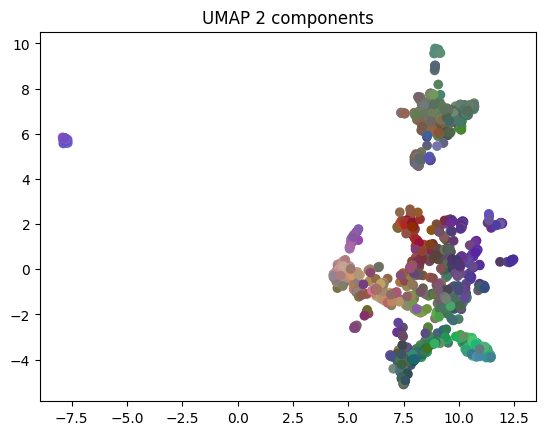

In [19]:
import matplotlib.pyplot as plt

reduced_embeddings = np.load('demo_data/combined_reduced_embeddings.npz')
dr.plot_embeddings(reduced_embeddings["umap2"], reduced_embeddings["pca5"][:, 2:5], "UMAP 2 components")

# Clustering (WIP)

### Generate Linkage Matrix (Perform Agglomerative Clustering)

In [20]:
reduced_npz = np.load('./demo_data/combined_reduced_embeddings.npz', allow_pickle=True)
embedding_npz = np.load('./demo_data/combined_embeddings.npz', allow_pickle=True)

filenames = embedding_npz['filenames']
embeddings = embedding_npz['embeddings']
umap2 = reduced_npz['umap2']
pca5 = reduced_npz['pca5']
# tsne2 = reduced_npz['tsne2']


In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, to_tree
import matplotlib.pyplot as plt

# Perform hierarchical clustering using the 'ward' method
linked = linkage(embeddings, method='ward')

### Adding Colors to Linkages (from PCA)

In [10]:
import matplotlib.colors as mcolors

# Adds colors for linkages by blending the leave colors together, recursively
# if t is 1, color2 is returned, if it is 0, color1 is
def blend_colors(color1, color2, t):
    r1, g1, b1 = color1
    r2, g2, b2 = color2

    r = r1 * (1 - t) + r2 * t
    g = g1 * (1 - t) + g2 * t
    b = b1 * (1 - t) + b2 * t

    return (r, g, b)

colors = pca5[:, 2:5]
num_samples = len(filenames)

for row in linked:
    cluster1_id = int(row[0])
    cluster2_id = int(row[1])

    if cluster1_id < len(filenames): # it is a sample/leaf
        cluster1_size = 1
    else:
        cluster1_size = linked[num_samples - cluster1_id][-1]
    
    if cluster2_id < len(filenames): # it is a sample/leaf
        cluster2_size = 1
    else:
        cluster2_size = linked[num_samples - cluster2_id][-1]

    # If a cluster is huge and is blended with a leaf, the color should be mostly the leaf color
    # Can try different weighting here
    t = cluster2_size / (cluster1_size + cluster2_size)

    color1 = colors[cluster1_id]
    color2 = colors[cluster2_id]

    merged_cluster_color = blend_colors(color1, color2, t)
    
    colors = np.vstack((colors, merged_cluster_color))

# converts rgb (0-1) to hex
colors = [mcolors.to_hex(color) for color in colors]

/Users/aidanbx/miniconda/envs/cv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129504 (\N{BRAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aidanbx/miniconda/envs/cv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128140 (\N{LOVE LETTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


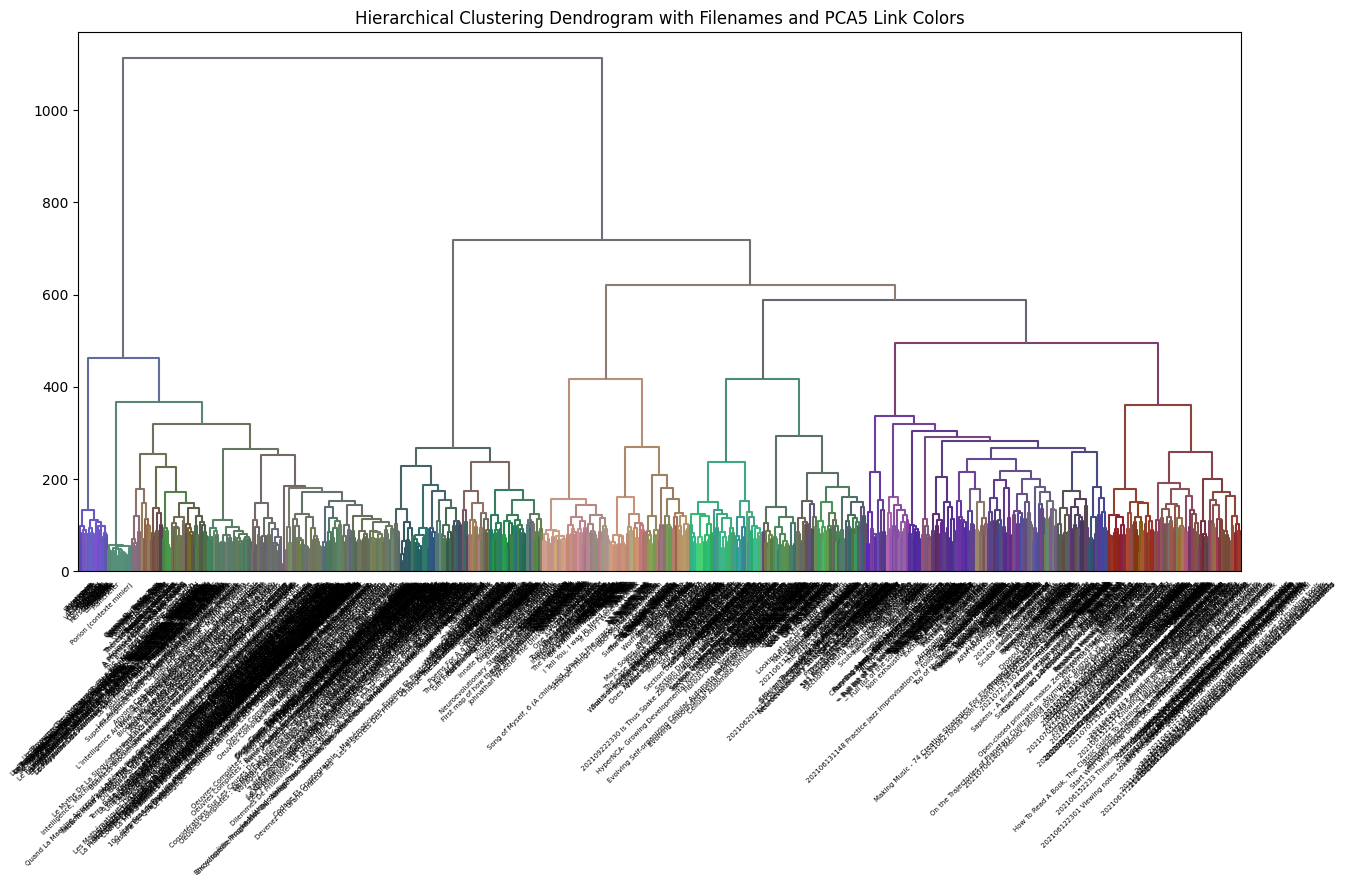

In [21]:
# Plot the dendrogram with custom labels and link colors
plt.figure(figsize=(15, 7))
dendrogram(linked, leaf_rotation=45, labels=[name for name in filenames], link_color_func=lambda link_id: colors[link_id])
plt.title('Hierarchical Clustering Dendrogram with Filenames and PCA5 Link Colors')
plt.show()

### Adding Linkage Labels

In [ ]:
for row in linked:
    cluster1_id = int(row[0])
    cluster2_id = int(row[1])

    if cluster1_id < len(filenames): # it is a sample/leaf
        cluster1_size = 1
    else:
        cluster1_size = linked[num_samples - cluster1_id][-1]
    
    if cluster2_id < len(filenames): # it is a sample/leaf
        cluster2_size = 1
    else:
        cluster2_size = linked[num_samples - cluster2_id][-1]

    # If a cluster is huge and is blended with a leaf, the color should be mostly the leaf color
    # Can try different weighting here
    t = cluster2_size / (cluster1_size + cluster2_size)

    color1 = colors[cluster1_id]
    color2 = colors[cluster2_id]

    merged_cluster_color = blend_colors(color1, color2, t)
    
    colors = np.vstack((colors, merged_cluster_color))

# Extracting Clusters

In [147]:
for i in range(10): # 10 
    i = linked.shape[0] - i - 1
    cluster_id = i + len(filenames)
    print(f"{cluster_id} {linked[i]}")

2478 [2473.         2477.         1113.47681568 1240.        ]
2477 [2459.         2476.          717.70604954  903.        ]
2476 [2471.        2475.         620.4269591  745.       ]
2475 [2472.         2474.          587.87273666  588.        ]
2474 [2468.         2469.          495.36460784  399.        ]
2473 [2360.         2470.          463.45072097  337.        ]
2472 [2452.         2464.          416.45180775  189.        ]
2471 [2409.        2461.         416.2986621  157.       ]
2470 [1441.         2466.          366.57315072  306.        ]
2469 [2427.         2457.          361.48838176  142.        ]


----

In [108]:
import numpy as np
from scipy.cluster.hierarchy import fcluster

# Assuming you have the linkage matrix `linked` and `embeddings` available

# Set a threshold to determine clusters, usually using the distance criterion
threshold = 1.5

# Get cluster assignments for each data point
cluster_assignments = fcluster(linked, threshold, criterion='distance')

# Find the unique cluster labels and their counts
unique_clusters, counts = np.unique(cluster_assignments, return_counts=True)

# Get the indices of the largest clusters (e.g., the top 5 largest clusters)
num_clusters = 5
largest_clusters_indices = np.argsort(counts)[-num_clusters:]

# Get the labels of the largest clusters
largest_clusters_labels = unique_clusters[largest_clusters_indices]

# Extract the embeddings of the largest clusters
largest_clusters_embeddings = [embeddings[cluster_assignments == label] for label in largest_clusters_labels]

# `largest_clusters_embeddings` now contains the embeddings for each of the largest clusters

In [113]:
import importlib
import src.dimensionality_reduction as dr
importlib.reload(dr)
import matplotlib.pyplot as plt

# Assuming you have the `largest_clusters_embeddings` from the previous step
reductions_to_perform = ['pca5', 'umap2']

# Initialize an empty dictionary to store reduced embeddings for each cluster
reduced_clusters_embeddings = {}
# Process each cluster
for idx, cluster_embeddings in enumerate(largest_clusters_embeddings):
    # Run dimensionality reduction on the current cluster
    reduced_embeddings = dr.run_dimensionality_reduction(cluster_embeddings, reductions_to_perform)

    # Save the reduced embeddings in the dictionary with the cluster index as the key
    reduced_clusters_embeddings[idx] = reduced_embeddings

    # Plot the reduced embeddings for the current cluster using UMAP 2 components
    plt.figure()
    dr.plot_embeddings(reduced_embeddings["umap2"], reduced_embeddings["pca5"][:, 2:5], f"UMAP 2 components - Cluster {idx+1}")


(2, 4096)
(2, 4096)
(2, 4096)
(2, 4096)
(3, 4096)


# Voronoi Diagrams